## Triple MA 回测(rb88_2013_2017, 5min)

### 5分钟级别，三均线策略
> + 10, 20, 120均线
> + 120均线做多空过滤

+ close, MA10 在MA120之上
  * MA10 上穿 MA20， 金叉，做多
  * MA10 下穿 MA20， 死叉， 平多
+ close，MA10在MA120之下
  * MA10 下穿 MA20， 死叉，做空
  * MA10 上穿 MA20， 金叉，平空

---
## 一、读取数据至mongodb

In [1]:
import pymongo
import pandas as pd
import numpy as np
import csv
from vnpy.trader.vtObject import VtBarData
from vnpy.trader.vtGlobal import globalSetting

In [4]:
client = pymongo.MongoClient(globalSetting['mongoHost'], globalSetting['mongoPort']) 

In [2]:
dbName = 'VnTrader_5min_Db'
symbol = 'rb88'

In [6]:
collection = client[dbName][symbol]
collection.ensure_index([('datetime', pymongo.ASCENDING)], unique=True)   

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: ensure_index is deprecated. Use create_index instead.
  


u'datetime_1'

In [8]:
fileName = 'RB88_20160101_20161231_M5.csv'

In [9]:
reader = csv.DictReader(file(fileName,'r'))

In [31]:
from datetime import datetime, timedelta
from time import time
start = time()
print u'开始读取CSV文件%s中的数据插入到%s的%s中' %(fileName, dbName, symbol)
for d in reader:
    bar = VtBarData()
    bar.vtSymbol = symbol
    bar.symbol = symbol
    bar.open = float(d['open'])
    bar.high = float(d['high'])
    bar.low = float(d['low'])
    bar.close = float(d['close'])
    bar.datetime = datetime.strptime(d['index'],'%Y-%m-%d %H:%M')
    bar.date = d['index'].split(' ')[0]
    bar.time = d['index'].split(' ')[1]
#     bar.datetime = datetime.strptime(bar.date + ' ' + bar.time, '%Y%m%d %H:%M:%S')
    bar.volume = d['volume']

    flt = {'datetime': bar.datetime}
    collection.update_one(flt, {'$set':bar.__dict__}, upsert=True)  
    print bar.date, bar.time
    
print u'插入完毕，耗时：%s' % (time()-start)

开始读取CSV文件RB88_20160101_20161231_M5.csv中的数据插入到VnTrader_5min_Db的rb88中
2016-1-4 9:10
2016-1-4 9:15
2016-1-4 9:20
2016-1-4 9:25
2016-1-4 9:30
2016-1-4 9:35
2016-1-4 9:40
2016-1-4 9:45
2016-1-4 9:50
2016-1-4 9:55
2016-1-4 10:00
2016-1-4 10:05
2016-1-4 10:10
2016-1-4 10:15
2016-1-4 10:35
2016-1-4 10:40
2016-1-4 10:45
2016-1-4 10:50
2016-1-4 10:55
2016-1-4 11:00
2016-1-4 11:05
2016-1-4 11:10
2016-1-4 11:15
2016-1-4 11:20
2016-1-4 11:25
2016-1-4 11:30
2016-1-4 13:35
2016-1-4 13:40
2016-1-4 13:45
2016-1-4 13:50
2016-1-4 13:55
2016-1-4 14:00
2016-1-4 14:05
2016-1-4 14:10
2016-1-4 14:15
2016-1-4 14:20
2016-1-4 14:25
2016-1-4 14:30
2016-1-4 14:35
2016-1-4 14:40
2016-1-4 14:45
2016-1-4 14:50
2016-1-4 14:55
2016-1-4 15:00
2016-1-4 21:05
2016-1-4 21:10
2016-1-4 21:15
2016-1-4 21:20
2016-1-4 21:25
2016-1-4 21:30
2016-1-4 21:35
2016-1-4 21:40
2016-1-4 21:45
2016-1-4 21:50
2016-1-4 21:55
2016-1-4 22:00
2016-1-4 22:05
2016-1-4 22:10
2016-1-4 22:15
2016-1-4 22:20
2016-1-4 22:25
2016-1-4 22:30
2016-1-4 22:

2016-1-12 23:00
2016-1-12 23:05
2016-1-12 23:10
2016-1-12 23:15
2016-1-12 23:20
2016-1-12 23:25
2016-1-12 23:30
2016-1-12 23:35
2016-1-12 23:40
2016-1-12 23:45
2016-1-12 23:50
2016-1-12 23:55
2016-1-13 0:00
2016-1-13 0:05
2016-1-13 0:10
2016-1-13 0:15
2016-1-13 0:20
2016-1-13 0:25
2016-1-13 0:30
2016-1-13 0:35
2016-1-13 0:40
2016-1-13 0:45
2016-1-13 0:50
2016-1-13 0:55
2016-1-13 1:00
2016-1-13 9:05
2016-1-13 9:10
2016-1-13 9:15
2016-1-13 9:20
2016-1-13 9:25
2016-1-13 9:30
2016-1-13 9:35
2016-1-13 9:40
2016-1-13 9:45
2016-1-13 9:50
2016-1-13 9:55
2016-1-13 10:00
2016-1-13 10:05
2016-1-13 10:10
2016-1-13 10:15
2016-1-13 10:35
2016-1-13 10:40
2016-1-13 10:45
2016-1-13 10:50
2016-1-13 10:55
2016-1-13 11:00
2016-1-13 11:05
2016-1-13 11:10
2016-1-13 11:15
2016-1-13 11:20
2016-1-13 11:25
2016-1-13 11:30
2016-1-13 13:35
2016-1-13 13:40
2016-1-13 13:45
2016-1-13 13:50
2016-1-13 13:55
2016-1-13 14:00
2016-1-13 14:05
2016-1-13 14:10
2016-1-13 14:15
2016-1-13 14:20
2016-1-13 14:25
2016-1-13 14:30


2016-1-21 22:35
2016-1-21 22:40
2016-1-21 22:45
2016-1-21 22:50
2016-1-21 22:55
2016-1-21 23:00
2016-1-21 23:05
2016-1-21 23:10
2016-1-21 23:15
2016-1-21 23:20
2016-1-21 23:25
2016-1-21 23:30
2016-1-21 23:35
2016-1-21 23:40
2016-1-21 23:45
2016-1-21 23:50
2016-1-21 23:55
2016-1-22 0:00
2016-1-22 0:05
2016-1-22 0:10
2016-1-22 0:15
2016-1-22 0:20
2016-1-22 0:25
2016-1-22 0:30
2016-1-22 0:35
2016-1-22 0:40
2016-1-22 0:45
2016-1-22 0:50
2016-1-22 0:55
2016-1-22 1:00
2016-1-22 9:05
2016-1-22 9:10
2016-1-22 9:15
2016-1-22 9:20
2016-1-22 9:25
2016-1-22 9:30
2016-1-22 9:35
2016-1-22 9:40
2016-1-22 9:45
2016-1-22 9:50
2016-1-22 9:55
2016-1-22 10:00
2016-1-22 10:05
2016-1-22 10:10
2016-1-22 10:15
2016-1-22 10:35
2016-1-22 10:40
2016-1-22 10:45
2016-1-22 10:50
2016-1-22 10:55
2016-1-22 11:00
2016-1-22 11:05
2016-1-22 11:10
2016-1-22 11:15
2016-1-22 11:20
2016-1-22 11:25
2016-1-22 11:30
2016-1-22 13:35
2016-1-22 13:40
2016-1-22 13:45
2016-1-22 13:50
2016-1-22 13:55
2016-1-22 14:00
2016-1-22 14:05


2016-2-2 0:40
2016-2-2 0:45
2016-2-2 0:50
2016-2-2 0:55
2016-2-2 1:00
2016-2-2 9:05
2016-2-2 9:10
2016-2-2 9:15
2016-2-2 9:20
2016-2-2 9:25
2016-2-2 9:30
2016-2-2 9:35
2016-2-2 9:40
2016-2-2 9:45
2016-2-2 9:50
2016-2-2 9:55
2016-2-2 10:00
2016-2-2 10:05
2016-2-2 10:10
2016-2-2 10:15
2016-2-2 10:35
2016-2-2 10:40
2016-2-2 10:45
2016-2-2 10:50
2016-2-2 10:55
2016-2-2 11:00
2016-2-2 11:05
2016-2-2 11:10
2016-2-2 11:15
2016-2-2 11:20
2016-2-2 11:25
2016-2-2 11:30
2016-2-2 13:35
2016-2-2 13:40
2016-2-2 13:45
2016-2-2 13:50
2016-2-2 13:55
2016-2-2 14:00
2016-2-2 14:05
2016-2-2 14:10
2016-2-2 14:15
2016-2-2 14:20
2016-2-2 14:25
2016-2-2 14:30
2016-2-2 14:35
2016-2-2 14:40
2016-2-2 14:45
2016-2-2 14:50
2016-2-2 14:55
2016-2-2 15:00
2016-2-2 21:05
2016-2-2 21:10
2016-2-2 21:15
2016-2-2 21:20
2016-2-2 21:25
2016-2-2 21:30
2016-2-2 21:35
2016-2-2 21:40
2016-2-2 21:45
2016-2-2 21:50
2016-2-2 21:55
2016-2-2 22:00
2016-2-2 22:05
2016-2-2 22:10
2016-2-2 22:15
2016-2-2 22:20
2016-2-2 22:25
2016-2-2 22

2016-2-18 22:10
2016-2-18 22:15
2016-2-18 22:20
2016-2-18 22:25
2016-2-18 22:30
2016-2-18 22:35
2016-2-18 22:40
2016-2-18 22:45
2016-2-18 22:50
2016-2-18 22:55
2016-2-18 23:00
2016-2-18 23:05
2016-2-18 23:10
2016-2-18 23:15
2016-2-18 23:20
2016-2-18 23:25
2016-2-18 23:30
2016-2-18 23:35
2016-2-18 23:40
2016-2-18 23:45
2016-2-18 23:50
2016-2-18 23:55
2016-2-19 0:00
2016-2-19 0:05
2016-2-19 0:10
2016-2-19 0:15
2016-2-19 0:20
2016-2-19 0:25
2016-2-19 0:30
2016-2-19 0:35
2016-2-19 0:40
2016-2-19 0:45
2016-2-19 0:50
2016-2-19 0:55
2016-2-19 1:00
2016-2-19 9:05
2016-2-19 9:10
2016-2-19 9:15
2016-2-19 9:20
2016-2-19 9:25
2016-2-19 9:30
2016-2-19 9:35
2016-2-19 9:40
2016-2-19 9:45
2016-2-19 9:50
2016-2-19 9:55
2016-2-19 10:00
2016-2-19 10:05
2016-2-19 10:10
2016-2-19 10:15
2016-2-19 10:35
2016-2-19 10:40
2016-2-19 10:45
2016-2-19 10:50
2016-2-19 10:55
2016-2-19 11:00
2016-2-19 11:05
2016-2-19 11:10
2016-2-19 11:15
2016-2-19 11:20
2016-2-19 11:25
2016-2-19 11:30
2016-2-19 13:35
2016-2-19 13:40


2016-2-26 21:20
2016-2-26 21:25
2016-2-26 21:30
2016-2-26 21:35
2016-2-26 21:40
2016-2-26 21:45
2016-2-26 21:50
2016-2-26 21:55
2016-2-26 22:00
2016-2-26 22:05
2016-2-26 22:10
2016-2-26 22:15
2016-2-26 22:20
2016-2-26 22:25
2016-2-26 22:30
2016-2-26 22:35
2016-2-26 22:40
2016-2-26 22:45
2016-2-26 22:50
2016-2-26 22:55
2016-2-26 23:00
2016-2-26 23:05
2016-2-26 23:10
2016-2-26 23:15
2016-2-26 23:20
2016-2-26 23:25
2016-2-26 23:30
2016-2-26 23:35
2016-2-26 23:40
2016-2-26 23:45
2016-2-26 23:50
2016-2-26 23:55
2016-2-27 0:00
2016-2-27 0:05
2016-2-27 0:10
2016-2-27 0:15
2016-2-27 0:20
2016-2-27 0:25
2016-2-27 0:30
2016-2-27 0:35
2016-2-27 0:40
2016-2-27 0:45
2016-2-27 0:50
2016-2-27 0:55
2016-2-27 1:00
2016-2-29 9:05
2016-2-29 9:10
2016-2-29 9:15
2016-2-29 9:20
2016-2-29 9:25
2016-2-29 9:30
2016-2-29 9:35
2016-2-29 9:40
2016-2-29 9:45
2016-2-29 9:50
2016-2-29 9:55
2016-2-29 10:00
2016-2-29 10:05
2016-2-29 10:10
2016-2-29 10:15
2016-2-29 10:35
2016-2-29 10:40
2016-2-29 10:45
2016-2-29 10:50


2016-3-10 14:15
2016-3-10 14:20
2016-3-10 14:25
2016-3-10 14:30
2016-3-10 14:35
2016-3-10 14:40
2016-3-10 14:45
2016-3-10 14:50
2016-3-10 14:55
2016-3-10 15:00
2016-3-10 21:05
2016-3-10 21:10
2016-3-10 21:15
2016-3-10 21:20
2016-3-10 21:25
2016-3-10 21:30
2016-3-10 21:35
2016-3-10 21:40
2016-3-10 21:45
2016-3-10 21:50
2016-3-10 21:55
2016-3-10 22:00
2016-3-10 22:05
2016-3-10 22:10
2016-3-10 22:15
2016-3-10 22:20
2016-3-10 22:25
2016-3-10 22:30
2016-3-10 22:35
2016-3-10 22:40
2016-3-10 22:45
2016-3-10 22:50
2016-3-10 22:55
2016-3-10 23:00
2016-3-10 23:05
2016-3-10 23:10
2016-3-10 23:15
2016-3-10 23:20
2016-3-10 23:25
2016-3-10 23:30
2016-3-10 23:35
2016-3-10 23:40
2016-3-10 23:45
2016-3-10 23:50
2016-3-10 23:55
2016-3-11 0:00
2016-3-11 0:05
2016-3-11 0:10
2016-3-11 0:15
2016-3-11 0:20
2016-3-11 0:25
2016-3-11 0:30
2016-3-11 0:35
2016-3-11 0:40
2016-3-11 0:45
2016-3-11 0:50
2016-3-11 0:55
2016-3-11 1:00
2016-3-11 9:05
2016-3-11 9:10
2016-3-11 9:15
2016-3-11 9:20
2016-3-11 9:25
2016-3-11 

2016-3-19 0:20
2016-3-19 0:25
2016-3-19 0:30
2016-3-19 0:35
2016-3-19 0:40
2016-3-19 0:45
2016-3-19 0:50
2016-3-19 0:55
2016-3-19 1:00
2016-3-21 9:05
2016-3-21 9:10
2016-3-21 9:15
2016-3-21 9:20
2016-3-21 9:25
2016-3-21 9:30
2016-3-21 9:35
2016-3-21 9:40
2016-3-21 9:45
2016-3-21 9:50
2016-3-21 9:55
2016-3-21 10:00
2016-3-21 10:05
2016-3-21 10:10
2016-3-21 10:15
2016-3-21 10:35
2016-3-21 10:40
2016-3-21 10:45
2016-3-21 10:50
2016-3-21 10:55
2016-3-21 11:00
2016-3-21 11:05
2016-3-21 11:10
2016-3-21 11:15
2016-3-21 11:20
2016-3-21 11:25
2016-3-21 11:30
2016-3-21 13:35
2016-3-21 13:40
2016-3-21 13:45
2016-3-21 13:50
2016-3-21 13:55
2016-3-21 14:00
2016-3-21 14:05
2016-3-21 14:10
2016-3-21 14:15
2016-3-21 14:20
2016-3-21 14:25
2016-3-21 14:30
2016-3-21 14:35
2016-3-21 14:40
2016-3-21 14:45
2016-3-21 14:50
2016-3-21 14:55
2016-3-21 15:00
2016-3-21 21:05
2016-3-21 21:10
2016-3-21 21:15
2016-3-21 21:20
2016-3-21 21:25
2016-3-21 21:30
2016-3-21 21:35
2016-3-21 21:40
2016-3-21 21:45
2016-3-21 21

2016-3-29 22:05
2016-3-29 22:10
2016-3-29 22:15
2016-3-29 22:20
2016-3-29 22:25
2016-3-29 22:30
2016-3-29 22:35
2016-3-29 22:40
2016-3-29 22:45
2016-3-29 22:50
2016-3-29 22:55
2016-3-29 23:00
2016-3-29 23:05
2016-3-29 23:10
2016-3-29 23:15
2016-3-29 23:20
2016-3-29 23:25
2016-3-29 23:30
2016-3-29 23:35
2016-3-29 23:40
2016-3-29 23:45
2016-3-29 23:50
2016-3-29 23:55
2016-3-30 0:00
2016-3-30 0:05
2016-3-30 0:10
2016-3-30 0:15
2016-3-30 0:20
2016-3-30 0:25
2016-3-30 0:30
2016-3-30 0:35
2016-3-30 0:40
2016-3-30 0:45
2016-3-30 0:50
2016-3-30 0:55
2016-3-30 1:00
2016-3-30 9:05
2016-3-30 9:10
2016-3-30 9:15
2016-3-30 9:20
2016-3-30 9:25
2016-3-30 9:30
2016-3-30 9:35
2016-3-30 9:40
2016-3-30 9:45
2016-3-30 9:50
2016-3-30 9:55
2016-3-30 10:00
2016-3-30 10:05
2016-3-30 10:10
2016-3-30 10:15
2016-3-30 10:35
2016-3-30 10:40
2016-3-30 10:45
2016-3-30 10:50
2016-3-30 10:55
2016-3-30 11:00
2016-3-30 11:05
2016-3-30 11:10
2016-3-30 11:15
2016-3-30 11:20
2016-3-30 11:25
2016-3-30 11:30
2016-3-30 13:35


2016-4-8 14:05
2016-4-8 14:10
2016-4-8 14:15
2016-4-8 14:20
2016-4-8 14:25
2016-4-8 14:30
2016-4-8 14:35
2016-4-8 14:40
2016-4-8 14:45
2016-4-8 14:50
2016-4-8 14:55
2016-4-8 15:00
2016-4-8 21:05
2016-4-8 21:10
2016-4-8 21:15
2016-4-8 21:20
2016-4-8 21:25
2016-4-8 21:30
2016-4-8 21:35
2016-4-8 21:40
2016-4-8 21:45
2016-4-8 21:50
2016-4-8 21:55
2016-4-8 22:00
2016-4-8 22:05
2016-4-8 22:10
2016-4-8 22:15
2016-4-8 22:20
2016-4-8 22:25
2016-4-8 22:30
2016-4-8 22:35
2016-4-8 22:40
2016-4-8 22:45
2016-4-8 22:50
2016-4-8 22:55
2016-4-8 23:00
2016-4-8 23:05
2016-4-8 23:10
2016-4-8 23:15
2016-4-8 23:20
2016-4-8 23:25
2016-4-8 23:30
2016-4-8 23:35
2016-4-8 23:40
2016-4-8 23:45
2016-4-8 23:50
2016-4-8 23:55
2016-4-9 0:00
2016-4-9 0:05
2016-4-9 0:10
2016-4-9 0:15
2016-4-9 0:20
2016-4-9 0:25
2016-4-9 0:30
2016-4-9 0:35
2016-4-9 0:40
2016-4-9 0:45
2016-4-9 0:50
2016-4-9 0:55
2016-4-9 1:00
2016-4-11 9:05
2016-4-11 9:10
2016-4-11 9:15
2016-4-11 9:20
2016-4-11 9:25
2016-4-11 9:30
2016-4-11 9:35
2016-4-1

2016-4-19 22:40
2016-4-19 22:45
2016-4-19 22:50
2016-4-19 22:55
2016-4-19 23:00
2016-4-19 23:05
2016-4-19 23:10
2016-4-19 23:15
2016-4-19 23:20
2016-4-19 23:25
2016-4-19 23:30
2016-4-19 23:35
2016-4-19 23:40
2016-4-19 23:45
2016-4-19 23:50
2016-4-19 23:55
2016-4-20 0:00
2016-4-20 0:05
2016-4-20 0:10
2016-4-20 0:15
2016-4-20 0:20
2016-4-20 0:25
2016-4-20 0:30
2016-4-20 0:35
2016-4-20 0:40
2016-4-20 0:45
2016-4-20 0:50
2016-4-20 0:55
2016-4-20 1:00
2016-4-20 9:05
2016-4-20 9:10
2016-4-20 9:15
2016-4-20 9:20
2016-4-20 9:25
2016-4-20 9:30
2016-4-20 9:35
2016-4-20 9:40
2016-4-20 9:45
2016-4-20 9:50
2016-4-20 9:55
2016-4-20 10:00
2016-4-20 10:05
2016-4-20 10:10
2016-4-20 10:15
2016-4-20 10:35
2016-4-20 10:40
2016-4-20 10:45
2016-4-20 10:50
2016-4-20 10:55
2016-4-20 11:00
2016-4-20 11:05
2016-4-20 11:10
2016-4-20 11:15
2016-4-20 11:20
2016-4-20 11:25
2016-4-20 11:30
2016-4-20 13:35
2016-4-20 13:40
2016-4-20 13:45
2016-4-20 13:50
2016-4-20 13:55
2016-4-20 14:00
2016-4-20 14:05
2016-4-20 14:10


2016-4-28 14:55
2016-4-28 15:00
2016-4-28 21:05
2016-4-28 21:10
2016-4-28 21:15
2016-4-28 21:20
2016-4-28 21:25
2016-4-28 21:30
2016-4-28 21:35
2016-4-28 21:40
2016-4-28 21:45
2016-4-28 21:50
2016-4-28 21:55
2016-4-28 22:00
2016-4-28 22:05
2016-4-28 22:10
2016-4-28 22:15
2016-4-28 22:20
2016-4-28 22:25
2016-4-28 22:30
2016-4-28 22:35
2016-4-28 22:40
2016-4-28 22:45
2016-4-28 22:50
2016-4-28 22:55
2016-4-28 23:00
2016-4-28 23:05
2016-4-28 23:10
2016-4-28 23:15
2016-4-28 23:20
2016-4-28 23:25
2016-4-28 23:30
2016-4-28 23:35
2016-4-28 23:40
2016-4-28 23:45
2016-4-28 23:50
2016-4-28 23:55
2016-4-29 0:00
2016-4-29 0:05
2016-4-29 0:10
2016-4-29 0:15
2016-4-29 0:20
2016-4-29 0:25
2016-4-29 0:30
2016-4-29 0:35
2016-4-29 0:40
2016-4-29 0:45
2016-4-29 0:50
2016-4-29 0:55
2016-4-29 1:00
2016-4-29 9:05
2016-4-29 9:10
2016-4-29 9:15
2016-4-29 9:20
2016-4-29 9:25
2016-4-29 9:30
2016-4-29 9:35
2016-4-29 9:40
2016-4-29 9:45
2016-4-29 9:50
2016-4-29 9:55
2016-4-29 10:00
2016-4-29 10:05
2016-4-29 10:10


2016-5-13 13:40
2016-5-13 13:45
2016-5-13 13:50
2016-5-13 13:55
2016-5-13 14:00
2016-5-13 14:05
2016-5-13 14:10
2016-5-13 14:15
2016-5-13 14:20
2016-5-13 14:25
2016-5-13 14:30
2016-5-13 14:35
2016-5-13 14:40
2016-5-13 14:45
2016-5-13 14:50
2016-5-13 14:55
2016-5-13 15:00
2016-5-13 21:05
2016-5-13 21:10
2016-5-13 21:15
2016-5-13 21:20
2016-5-13 21:25
2016-5-13 21:30
2016-5-13 21:35
2016-5-13 21:40
2016-5-13 21:45
2016-5-13 21:50
2016-5-13 21:55
2016-5-13 22:00
2016-5-13 22:05
2016-5-13 22:10
2016-5-13 22:15
2016-5-13 22:20
2016-5-13 22:25
2016-5-13 22:30
2016-5-13 22:35
2016-5-13 22:40
2016-5-13 22:45
2016-5-13 22:50
2016-5-13 22:55
2016-5-13 23:00
2016-5-16 9:05
2016-5-16 9:10
2016-5-16 9:15
2016-5-16 9:20
2016-5-16 9:25
2016-5-16 9:30
2016-5-16 9:35
2016-5-16 9:40
2016-5-16 9:45
2016-5-16 9:50
2016-5-16 9:55
2016-5-16 10:00
2016-5-16 10:05
2016-5-16 10:10
2016-5-16 10:15
2016-5-16 10:35
2016-5-16 10:40
2016-5-16 10:45
2016-5-16 10:50
2016-5-16 10:55
2016-5-16 11:00
2016-5-16 11:05
201

2016-5-26 21:15
2016-5-26 21:20
2016-5-26 21:25
2016-5-26 21:30
2016-5-26 21:35
2016-5-26 21:40
2016-5-26 21:45
2016-5-26 21:50
2016-5-26 21:55
2016-5-26 22:00
2016-5-26 22:05
2016-5-26 22:10
2016-5-26 22:15
2016-5-26 22:20
2016-5-26 22:25
2016-5-26 22:30
2016-5-26 22:35
2016-5-26 22:40
2016-5-26 22:45
2016-5-26 22:50
2016-5-26 22:55
2016-5-26 23:00
2016-5-27 9:05
2016-5-27 9:10
2016-5-27 9:15
2016-5-27 9:20
2016-5-27 9:25
2016-5-27 9:30
2016-5-27 9:35
2016-5-27 9:40
2016-5-27 9:45
2016-5-27 9:50
2016-5-27 9:55
2016-5-27 10:00
2016-5-27 10:05
2016-5-27 10:10
2016-5-27 10:15
2016-5-27 10:35
2016-5-27 10:40
2016-5-27 10:45
2016-5-27 10:50
2016-5-27 10:55
2016-5-27 11:00
2016-5-27 11:05
2016-5-27 11:10
2016-5-27 11:15
2016-5-27 11:20
2016-5-27 11:25
2016-5-27 11:30
2016-5-27 13:35
2016-5-27 13:40
2016-5-27 13:45
2016-5-27 13:50
2016-5-27 13:55
2016-5-27 14:00
2016-5-27 14:05
2016-5-27 14:10
2016-5-27 14:15
2016-5-27 14:20
2016-5-27 14:25
2016-5-27 14:30
2016-5-27 14:35
2016-5-27 14:40
201

2016-6-13 21:40
2016-6-13 21:45
2016-6-13 21:50
2016-6-13 21:55
2016-6-13 22:00
2016-6-13 22:05
2016-6-13 22:10
2016-6-13 22:15
2016-6-13 22:20
2016-6-13 22:25
2016-6-13 22:30
2016-6-13 22:35
2016-6-13 22:40
2016-6-13 22:45
2016-6-13 22:50
2016-6-13 22:55
2016-6-13 23:00
2016-6-14 9:05
2016-6-14 9:10
2016-6-14 9:15
2016-6-14 9:20
2016-6-14 9:25
2016-6-14 9:30
2016-6-14 9:35
2016-6-14 9:40
2016-6-14 9:45
2016-6-14 9:50
2016-6-14 9:55
2016-6-14 10:00
2016-6-14 10:05
2016-6-14 10:10
2016-6-14 10:15
2016-6-14 10:35
2016-6-14 10:40
2016-6-14 10:45
2016-6-14 10:50
2016-6-14 10:55
2016-6-14 11:00
2016-6-14 11:05
2016-6-14 11:10
2016-6-14 11:15
2016-6-14 11:20
2016-6-14 11:25
2016-6-14 11:30
2016-6-14 13:35
2016-6-14 13:40
2016-6-14 13:45
2016-6-14 13:50
2016-6-14 13:55
2016-6-14 14:00
2016-6-14 14:05
2016-6-14 14:10
2016-6-14 14:15
2016-6-14 14:20
2016-6-14 14:25
2016-6-14 14:30
2016-6-14 14:35
2016-6-14 14:40
2016-6-14 14:45
2016-6-14 14:50
2016-6-14 14:55
2016-6-14 15:00
2016-6-14 21:05
201

2016-6-24 15:00
2016-6-24 21:05
2016-6-24 21:10
2016-6-24 21:15
2016-6-24 21:20
2016-6-24 21:25
2016-6-24 21:30
2016-6-24 21:35
2016-6-24 21:40
2016-6-24 21:45
2016-6-24 21:50
2016-6-24 21:55
2016-6-24 22:00
2016-6-24 22:05
2016-6-24 22:10
2016-6-24 22:15
2016-6-24 22:20
2016-6-24 22:25
2016-6-24 22:30
2016-6-24 22:35
2016-6-24 22:40
2016-6-24 22:45
2016-6-24 22:50
2016-6-24 22:55
2016-6-24 23:00
2016-6-27 9:05
2016-6-27 9:10
2016-6-27 9:15
2016-6-27 9:20
2016-6-27 9:25
2016-6-27 9:30
2016-6-27 9:35
2016-6-27 9:40
2016-6-27 9:45
2016-6-27 9:50
2016-6-27 9:55
2016-6-27 10:00
2016-6-27 10:05
2016-6-27 10:10
2016-6-27 10:15
2016-6-27 10:35
2016-6-27 10:40
2016-6-27 10:45
2016-6-27 10:50
2016-6-27 10:55
2016-6-27 11:00
2016-6-27 11:05
2016-6-27 11:10
2016-6-27 11:15
2016-6-27 11:20
2016-6-27 11:25
2016-6-27 11:30
2016-6-27 13:35
2016-6-27 13:40
2016-6-27 13:45
2016-6-27 13:50
2016-6-27 13:55
2016-6-27 14:00
2016-6-27 14:05
2016-6-27 14:10
2016-6-27 14:15
2016-6-27 14:20
2016-6-27 14:25
201

2016-7-7 21:45
2016-7-7 21:50
2016-7-7 21:55
2016-7-7 22:00
2016-7-7 22:05
2016-7-7 22:10
2016-7-7 22:15
2016-7-7 22:20
2016-7-7 22:25
2016-7-7 22:30
2016-7-7 22:35
2016-7-7 22:40
2016-7-7 22:45
2016-7-7 22:50
2016-7-7 22:55
2016-7-7 23:00
2016-7-8 9:05
2016-7-8 9:10
2016-7-8 9:15
2016-7-8 9:20
2016-7-8 9:25
2016-7-8 9:30
2016-7-8 9:35
2016-7-8 9:40
2016-7-8 9:45
2016-7-8 9:50
2016-7-8 9:55
2016-7-8 10:00
2016-7-8 10:05
2016-7-8 10:10
2016-7-8 10:15
2016-7-8 10:35
2016-7-8 10:40
2016-7-8 10:45
2016-7-8 10:50
2016-7-8 10:55
2016-7-8 11:00
2016-7-8 11:05
2016-7-8 11:10
2016-7-8 11:15
2016-7-8 11:20
2016-7-8 11:25
2016-7-8 11:30
2016-7-8 13:35
2016-7-8 13:40
2016-7-8 13:45
2016-7-8 13:50
2016-7-8 13:55
2016-7-8 14:00
2016-7-8 14:05
2016-7-8 14:10
2016-7-8 14:15
2016-7-8 14:20
2016-7-8 14:25
2016-7-8 14:30
2016-7-8 14:35
2016-7-8 14:40
2016-7-8 14:45
2016-7-8 14:50
2016-7-8 14:55
2016-7-8 15:00
2016-7-8 21:05
2016-7-8 21:10
2016-7-8 21:15
2016-7-8 21:20
2016-7-8 21:25
2016-7-8 21:30
2016-7

2016-7-21 15:00
2016-7-21 21:05
2016-7-21 21:10
2016-7-21 21:15
2016-7-21 21:20
2016-7-21 21:25
2016-7-21 21:30
2016-7-21 21:35
2016-7-21 21:40
2016-7-21 21:45
2016-7-21 21:50
2016-7-21 21:55
2016-7-21 22:00
2016-7-21 22:05
2016-7-21 22:10
2016-7-21 22:15
2016-7-21 22:20
2016-7-21 22:25
2016-7-21 22:30
2016-7-21 22:35
2016-7-21 22:40
2016-7-21 22:45
2016-7-21 22:50
2016-7-21 22:55
2016-7-21 23:00
2016-7-22 9:05
2016-7-22 9:10
2016-7-22 9:15
2016-7-22 9:20
2016-7-22 9:25
2016-7-22 9:30
2016-7-22 9:35
2016-7-22 9:40
2016-7-22 9:45
2016-7-22 9:50
2016-7-22 9:55
2016-7-22 10:00
2016-7-22 10:05
2016-7-22 10:10
2016-7-22 10:15
2016-7-22 10:35
2016-7-22 10:40
2016-7-22 10:45
2016-7-22 10:50
2016-7-22 10:55
2016-7-22 11:00
2016-7-22 11:05
2016-7-22 11:10
2016-7-22 11:15
2016-7-22 11:20
2016-7-22 11:25
2016-7-22 11:30
2016-7-22 13:35
2016-7-22 13:40
2016-7-22 13:45
2016-7-22 13:50
2016-7-22 13:55
2016-7-22 14:00
2016-7-22 14:05
2016-7-22 14:10
2016-7-22 14:15
2016-7-22 14:20
2016-7-22 14:25
201

2016-8-4 13:55
2016-8-4 14:00
2016-8-4 14:05
2016-8-4 14:10
2016-8-4 14:15
2016-8-4 14:20
2016-8-4 14:25
2016-8-4 14:30
2016-8-4 14:35
2016-8-4 14:40
2016-8-4 14:45
2016-8-4 14:50
2016-8-4 14:55
2016-8-4 15:00
2016-8-4 21:05
2016-8-4 21:10
2016-8-4 21:15
2016-8-4 21:20
2016-8-4 21:25
2016-8-4 21:30
2016-8-4 21:35
2016-8-4 21:40
2016-8-4 21:45
2016-8-4 21:50
2016-8-4 21:55
2016-8-4 22:00
2016-8-4 22:05
2016-8-4 22:10
2016-8-4 22:15
2016-8-4 22:20
2016-8-4 22:25
2016-8-4 22:30
2016-8-4 22:35
2016-8-4 22:40
2016-8-4 22:45
2016-8-4 22:50
2016-8-4 22:55
2016-8-4 23:00
2016-8-5 9:05
2016-8-5 9:10
2016-8-5 9:15
2016-8-5 9:20
2016-8-5 9:25
2016-8-5 9:30
2016-8-5 9:35
2016-8-5 9:40
2016-8-5 9:45
2016-8-5 9:50
2016-8-5 9:55
2016-8-5 10:00
2016-8-5 10:05
2016-8-5 10:10
2016-8-5 10:15
2016-8-5 10:35
2016-8-5 10:40
2016-8-5 10:45
2016-8-5 10:50
2016-8-5 10:55
2016-8-5 11:00
2016-8-5 11:05
2016-8-5 11:10
2016-8-5 11:15
2016-8-5 11:20
2016-8-5 11:25
2016-8-5 11:30
2016-8-5 13:35
2016-8-5 13:40
2016-8

2016-8-17 11:25
2016-8-17 11:30
2016-8-17 13:35
2016-8-17 13:40
2016-8-17 13:45
2016-8-17 13:50
2016-8-17 13:55
2016-8-17 14:00
2016-8-17 14:05
2016-8-17 14:10
2016-8-17 14:15
2016-8-17 14:20
2016-8-17 14:25
2016-8-17 14:30
2016-8-17 14:35
2016-8-17 14:40
2016-8-17 14:45
2016-8-17 14:50
2016-8-17 14:55
2016-8-17 15:00
2016-8-17 21:05
2016-8-17 21:10
2016-8-17 21:15
2016-8-17 21:20
2016-8-17 21:25
2016-8-17 21:30
2016-8-17 21:35
2016-8-17 21:40
2016-8-17 21:45
2016-8-17 21:50
2016-8-17 21:55
2016-8-17 22:00
2016-8-17 22:05
2016-8-17 22:10
2016-8-17 22:15
2016-8-17 22:20
2016-8-17 22:25
2016-8-17 22:30
2016-8-17 22:35
2016-8-17 22:40
2016-8-17 22:45
2016-8-17 22:50
2016-8-17 22:55
2016-8-17 23:00
2016-8-18 9:05
2016-8-18 9:10
2016-8-18 9:15
2016-8-18 9:20
2016-8-18 9:25
2016-8-18 9:30
2016-8-18 9:35
2016-8-18 9:40
2016-8-18 9:45
2016-8-18 9:50
2016-8-18 9:55
2016-8-18 10:00
2016-8-18 10:05
2016-8-18 10:10
2016-8-18 10:15
2016-8-18 10:35
2016-8-18 10:40
2016-8-18 10:45
2016-8-18 10:50
201

2016-8-30 21:40
2016-8-30 21:45
2016-8-30 21:50
2016-8-30 21:55
2016-8-30 22:00
2016-8-30 22:05
2016-8-30 22:10
2016-8-30 22:15
2016-8-30 22:20
2016-8-30 22:25
2016-8-30 22:30
2016-8-30 22:35
2016-8-30 22:40
2016-8-30 22:45
2016-8-30 22:50
2016-8-30 22:55
2016-8-30 23:00
2016-8-31 9:05
2016-8-31 9:10
2016-8-31 9:15
2016-8-31 9:20
2016-8-31 9:25
2016-8-31 9:30
2016-8-31 9:35
2016-8-31 9:40
2016-8-31 9:45
2016-8-31 9:50
2016-8-31 9:55
2016-8-31 10:00
2016-8-31 10:05
2016-8-31 10:10
2016-8-31 10:15
2016-8-31 10:35
2016-8-31 10:40
2016-8-31 10:45
2016-8-31 10:50
2016-8-31 10:55
2016-8-31 11:00
2016-8-31 11:05
2016-8-31 11:10
2016-8-31 11:15
2016-8-31 11:20
2016-8-31 11:25
2016-8-31 11:30
2016-8-31 13:35
2016-8-31 13:40
2016-8-31 13:45
2016-8-31 13:50
2016-8-31 13:55
2016-8-31 14:00
2016-8-31 14:05
2016-8-31 14:10
2016-8-31 14:15
2016-8-31 14:20
2016-8-31 14:25
2016-8-31 14:30
2016-8-31 14:35
2016-8-31 14:40
2016-8-31 14:45
2016-8-31 14:50
2016-8-31 14:55
2016-8-31 15:00
2016-8-31 21:05
201

2016-9-13 14:40
2016-9-13 14:45
2016-9-13 14:50
2016-9-13 14:55
2016-9-13 15:00
2016-9-13 21:05
2016-9-13 21:10
2016-9-13 21:15
2016-9-13 21:20
2016-9-13 21:25
2016-9-13 21:30
2016-9-13 21:35
2016-9-13 21:40
2016-9-13 21:45
2016-9-13 21:50
2016-9-13 21:55
2016-9-13 22:00
2016-9-13 22:05
2016-9-13 22:10
2016-9-13 22:15
2016-9-13 22:20
2016-9-13 22:25
2016-9-13 22:30
2016-9-13 22:35
2016-9-13 22:40
2016-9-13 22:45
2016-9-13 22:50
2016-9-13 22:55
2016-9-13 23:00
2016-9-14 9:05
2016-9-14 9:10
2016-9-14 9:15
2016-9-14 9:20
2016-9-14 9:25
2016-9-14 9:30
2016-9-14 9:35
2016-9-14 9:40
2016-9-14 9:45
2016-9-14 9:50
2016-9-14 9:55
2016-9-14 10:00
2016-9-14 10:05
2016-9-14 10:10
2016-9-14 10:15
2016-9-14 10:35
2016-9-14 10:40
2016-9-14 10:45
2016-9-14 10:50
2016-9-14 10:55
2016-9-14 11:00
2016-9-14 11:05
2016-9-14 11:10
2016-9-14 11:15
2016-9-14 11:20
2016-9-14 11:25
2016-9-14 11:30
2016-9-14 13:35
2016-9-14 13:40
2016-9-14 13:45
2016-9-14 13:50
2016-9-14 13:55
2016-9-14 14:00
2016-9-14 14:05
201

2016-9-27 14:30
2016-9-27 14:35
2016-9-27 14:40
2016-9-27 14:45
2016-9-27 14:50
2016-9-27 14:55
2016-9-27 15:00
2016-9-27 21:05
2016-9-27 21:10
2016-9-27 21:15
2016-9-27 21:20
2016-9-27 21:25
2016-9-27 21:30
2016-9-27 21:35
2016-9-27 21:40
2016-9-27 21:45
2016-9-27 21:50
2016-9-27 21:55
2016-9-27 22:00
2016-9-27 22:05
2016-9-27 22:10
2016-9-27 22:15
2016-9-27 22:20
2016-9-27 22:25
2016-9-27 22:30
2016-9-27 22:35
2016-9-27 22:40
2016-9-27 22:45
2016-9-27 22:50
2016-9-27 22:55
2016-9-27 23:00
2016-9-28 9:05
2016-9-28 9:10
2016-9-28 9:15
2016-9-28 9:20
2016-9-28 9:25
2016-9-28 9:30
2016-9-28 9:35
2016-9-28 9:40
2016-9-28 9:45
2016-9-28 9:50
2016-9-28 9:55
2016-9-28 10:00
2016-9-28 10:05
2016-9-28 10:10
2016-9-28 10:15
2016-9-28 10:35
2016-9-28 10:40
2016-9-28 10:45
2016-9-28 10:50
2016-9-28 10:55
2016-9-28 11:00
2016-9-28 11:05
2016-9-28 11:10
2016-9-28 11:15
2016-9-28 11:20
2016-9-28 11:25
2016-9-28 11:30
2016-9-28 13:35
2016-9-28 13:40
2016-9-28 13:45
2016-9-28 13:50
2016-9-28 13:55
201

2016-10-18 14:25
2016-10-18 14:30
2016-10-18 14:35
2016-10-18 14:40
2016-10-18 14:45
2016-10-18 14:50
2016-10-18 14:55
2016-10-18 15:00
2016-10-18 21:05
2016-10-18 21:10
2016-10-18 21:15
2016-10-18 21:20
2016-10-18 21:25
2016-10-18 21:30
2016-10-18 21:35
2016-10-18 21:40
2016-10-18 21:45
2016-10-18 21:50
2016-10-18 21:55
2016-10-18 22:00
2016-10-18 22:05
2016-10-18 22:10
2016-10-18 22:15
2016-10-18 22:20
2016-10-18 22:25
2016-10-18 22:30
2016-10-18 22:35
2016-10-18 22:40
2016-10-18 22:45
2016-10-18 22:50
2016-10-18 22:55
2016-10-18 23:00
2016-10-19 9:05
2016-10-19 9:10
2016-10-19 9:15
2016-10-19 9:20
2016-10-19 9:25
2016-10-19 9:30
2016-10-19 9:35
2016-10-19 9:40
2016-10-19 9:45
2016-10-19 9:50
2016-10-19 9:55
2016-10-19 10:00
2016-10-19 10:05
2016-10-19 10:10
2016-10-19 10:15
2016-10-19 10:35
2016-10-19 10:40
2016-10-19 10:45
2016-10-19 10:50
2016-10-19 10:55
2016-10-19 11:00
2016-10-19 11:05
2016-10-19 11:10
2016-10-19 11:15
2016-10-19 11:20
2016-10-19 11:25
2016-10-19 11:30
2016-10-

2016-10-28 9:05
2016-10-28 9:10
2016-10-28 9:15
2016-10-28 9:20
2016-10-28 9:25
2016-10-28 9:30
2016-10-28 9:35
2016-10-28 9:40
2016-10-28 9:45
2016-10-28 9:50
2016-10-28 9:55
2016-10-28 10:00
2016-10-28 10:05
2016-10-28 10:10
2016-10-28 10:15
2016-10-28 10:35
2016-10-28 10:40
2016-10-28 10:45
2016-10-28 10:50
2016-10-28 10:55
2016-10-28 11:00
2016-10-28 11:05
2016-10-28 11:10
2016-10-28 11:15
2016-10-28 11:20
2016-10-28 11:25
2016-10-28 11:30
2016-10-28 13:35
2016-10-28 13:40
2016-10-28 13:45
2016-10-28 13:50
2016-10-28 13:55
2016-10-28 14:00
2016-10-28 14:05
2016-10-28 14:10
2016-10-28 14:15
2016-10-28 14:20
2016-10-28 14:25
2016-10-28 14:30
2016-10-28 14:35
2016-10-28 14:40
2016-10-28 14:45
2016-10-28 14:50
2016-10-28 14:55
2016-10-28 15:00
2016-10-28 21:05
2016-10-28 21:10
2016-10-28 21:15
2016-10-28 21:20
2016-10-28 21:25
2016-10-28 21:30
2016-10-28 21:35
2016-10-28 21:40
2016-10-28 21:45
2016-10-28 21:50
2016-10-28 21:55
2016-10-28 22:00
2016-10-28 22:05
2016-10-28 22:10
2016-10-

2016-11-8 14:50
2016-11-8 14:55
2016-11-8 15:00
2016-11-8 21:05
2016-11-8 21:10
2016-11-8 21:15
2016-11-8 21:20
2016-11-8 21:25
2016-11-8 21:30
2016-11-8 21:35
2016-11-8 21:40
2016-11-8 21:45
2016-11-8 21:50
2016-11-8 21:55
2016-11-8 22:00
2016-11-8 22:05
2016-11-8 22:10
2016-11-8 22:15
2016-11-8 22:20
2016-11-8 22:25
2016-11-8 22:30
2016-11-8 22:35
2016-11-8 22:40
2016-11-8 22:45
2016-11-8 22:50
2016-11-8 22:55
2016-11-8 23:00
2016-11-9 9:05
2016-11-9 9:10
2016-11-9 9:15
2016-11-9 9:20
2016-11-9 9:25
2016-11-9 9:30
2016-11-9 9:35
2016-11-9 9:40
2016-11-9 9:45
2016-11-9 9:50
2016-11-9 9:55
2016-11-9 10:00
2016-11-9 10:05
2016-11-9 10:10
2016-11-9 10:15
2016-11-9 10:35
2016-11-9 10:40
2016-11-9 10:45
2016-11-9 10:50
2016-11-9 10:55
2016-11-9 11:00
2016-11-9 11:05
2016-11-9 11:10
2016-11-9 11:15
2016-11-9 11:20
2016-11-9 11:25
2016-11-9 11:30
2016-11-9 13:35
2016-11-9 13:40
2016-11-9 13:45
2016-11-9 13:50
2016-11-9 13:55
2016-11-9 14:00
2016-11-9 14:05
2016-11-9 14:10
2016-11-9 14:15
201

2016-11-17 21:40
2016-11-17 21:45
2016-11-17 21:50
2016-11-17 21:55
2016-11-17 22:00
2016-11-17 22:05
2016-11-17 22:10
2016-11-17 22:15
2016-11-17 22:20
2016-11-17 22:25
2016-11-17 22:30
2016-11-17 22:35
2016-11-17 22:40
2016-11-17 22:45
2016-11-17 22:50
2016-11-17 22:55
2016-11-17 23:00
2016-11-18 9:05
2016-11-18 9:10
2016-11-18 9:15
2016-11-18 9:20
2016-11-18 9:25
2016-11-18 9:30
2016-11-18 9:35
2016-11-18 9:40
2016-11-18 9:45
2016-11-18 9:50
2016-11-18 9:55
2016-11-18 10:00
2016-11-18 10:05
2016-11-18 10:10
2016-11-18 10:15
2016-11-18 10:35
2016-11-18 10:40
2016-11-18 10:45
2016-11-18 10:50
2016-11-18 10:55
2016-11-18 11:00
2016-11-18 11:05
2016-11-18 11:10
2016-11-18 11:15
2016-11-18 11:20
2016-11-18 11:25
2016-11-18 11:30
2016-11-18 13:35
2016-11-18 13:40
2016-11-18 13:45
2016-11-18 13:50
2016-11-18 13:55
2016-11-18 14:00
2016-11-18 14:05
2016-11-18 14:10
2016-11-18 14:15
2016-11-18 14:20
2016-11-18 14:25
2016-11-18 14:30
2016-11-18 14:35
2016-11-18 14:40
2016-11-18 14:45
2016-11-

2016-11-29 9:50
2016-11-29 9:55
2016-11-29 10:00
2016-11-29 10:05
2016-11-29 10:10
2016-11-29 10:15
2016-11-29 10:35
2016-11-29 10:40
2016-11-29 10:45
2016-11-29 10:50
2016-11-29 10:55
2016-11-29 11:00
2016-11-29 11:05
2016-11-29 11:10
2016-11-29 11:15
2016-11-29 11:20
2016-11-29 11:25
2016-11-29 11:30
2016-11-29 13:35
2016-11-29 13:40
2016-11-29 13:45
2016-11-29 13:50
2016-11-29 13:55
2016-11-29 14:00
2016-11-29 14:05
2016-11-29 14:10
2016-11-29 14:15
2016-11-29 14:20
2016-11-29 14:25
2016-11-29 14:30
2016-11-29 14:35
2016-11-29 14:40
2016-11-29 14:45
2016-11-29 14:50
2016-11-29 14:55
2016-11-29 15:00
2016-11-29 21:05
2016-11-29 21:10
2016-11-29 21:15
2016-11-29 21:20
2016-11-29 21:25
2016-11-29 21:30
2016-11-29 21:35
2016-11-29 21:40
2016-11-29 21:45
2016-11-29 21:50
2016-11-29 21:55
2016-11-29 22:00
2016-11-29 22:05
2016-11-29 22:10
2016-11-29 22:15
2016-11-29 22:20
2016-11-29 22:25
2016-11-29 22:30
2016-11-29 22:35
2016-11-29 22:40
2016-11-29 22:45
2016-11-29 22:50
2016-11-29 22:55

2016-12-13 9:05
2016-12-13 9:10
2016-12-13 9:15
2016-12-13 9:20
2016-12-13 9:25
2016-12-13 9:30
2016-12-13 9:35
2016-12-13 9:40
2016-12-13 9:45
2016-12-13 9:50
2016-12-13 9:55
2016-12-13 10:00
2016-12-13 10:05
2016-12-13 10:10
2016-12-13 10:15
2016-12-13 10:35
2016-12-13 10:40
2016-12-13 10:45
2016-12-13 10:50
2016-12-13 10:55
2016-12-13 11:00
2016-12-13 11:05
2016-12-13 11:10
2016-12-13 11:15
2016-12-13 11:20
2016-12-13 11:25
2016-12-13 11:30
2016-12-13 13:35
2016-12-13 13:40
2016-12-13 13:45
2016-12-13 13:50
2016-12-13 13:55
2016-12-13 14:00
2016-12-13 14:05
2016-12-13 14:10
2016-12-13 14:15
2016-12-13 14:20
2016-12-13 14:25
2016-12-13 14:30
2016-12-13 14:35
2016-12-13 14:40
2016-12-13 14:45
2016-12-13 14:50
2016-12-13 14:55
2016-12-13 15:00
2016-12-13 21:05
2016-12-13 21:10
2016-12-13 21:15
2016-12-13 21:20
2016-12-13 21:25
2016-12-13 21:30
2016-12-13 21:35
2016-12-13 21:40
2016-12-13 21:45
2016-12-13 21:50
2016-12-13 21:55
2016-12-13 22:00
2016-12-13 22:05
2016-12-13 22:10
2016-12-

2016-12-22 11:20
2016-12-22 11:25
2016-12-22 11:30
2016-12-22 13:35
2016-12-22 13:40
2016-12-22 13:45
2016-12-22 13:50
2016-12-22 13:55
2016-12-22 14:00
2016-12-22 14:05
2016-12-22 14:10
2016-12-22 14:15
2016-12-22 14:20
2016-12-22 14:25
2016-12-22 14:30
2016-12-22 14:35
2016-12-22 14:40
2016-12-22 14:45
2016-12-22 14:50
2016-12-22 14:55
2016-12-22 15:00
2016-12-22 21:05
2016-12-22 21:10
2016-12-22 21:15
2016-12-22 21:20
2016-12-22 21:25
2016-12-22 21:30
2016-12-22 21:35
2016-12-22 21:40
2016-12-22 21:45
2016-12-22 21:50
2016-12-22 21:55
2016-12-22 22:00
2016-12-22 22:05
2016-12-22 22:10
2016-12-22 22:15
2016-12-22 22:20
2016-12-22 22:25
2016-12-22 22:30
2016-12-22 22:35
2016-12-22 22:40
2016-12-22 22:45
2016-12-22 22:50
2016-12-22 22:55
2016-12-22 23:00
2016-12-23 9:05
2016-12-23 9:10
2016-12-23 9:15
2016-12-23 9:20
2016-12-23 9:25
2016-12-23 9:30
2016-12-23 9:35
2016-12-23 9:40
2016-12-23 9:45
2016-12-23 9:50
2016-12-23 9:55
2016-12-23 10:00
2016-12-23 10:05
2016-12-23 10:10
2016-12-

## 二、向量化回测

In [30]:
# 从数据库加载rb88的行情数据
c = pymongo.MongoClient()
col = c[dbName][symbol]
cx = col.find()
l = list(cx)

In [5]:
len(l)

18305

In [35]:
l[0]

{u'_id': ObjectId('5a902898b21152525f963b0d'),
 u'close': 1809.0,
 u'date': u'2016-1-4',
 u'datetime': datetime.datetime(2016, 1, 4, 9, 10),
 u'exchange': u'',
 u'gatewayName': u'',
 u'high': 1820.0,
 u'low': 1805.0,
 u'open': 1818.0,
 u'openInterest': 0,
 u'rawData': None,
 u'symbol': u'rb88',
 u'time': u'9:10',
 u'volume': u'350874',
 u'vtSymbol': u'rb88'}

In [31]:
# 转换成DataFrame
d = {}
for key in l[0].keys():
    d[key] = []
for data in l:
    for k, v in data.items():
        d[k].append(v)
        
df = pd.DataFrame.from_dict(d)

In [37]:
df.head()

,_id,close,date,datetime,exchange,gatewayName,high,low,open,openInterest,rawData,symbol,time,volume,vtSymbol
0,5a902898b21152525f963b0d,1809.0,2016-1-4,2016-01-04 09:10:00,,,1820.0,1805.0,1818.0,0,None,rb88,9:10,350874,rb88
1,5a902898b21152525f963b0f,1808.0,2016-1-4,2016-01-04 09:15:00,,,1813.0,1808.0,1809.0,0,None,rb88,9:15,234208,rb88
2,5a902898b21152525f963b11,1806.0,2016-1-4,2016-01-04 09:20:00,,,1808.0,1802.0,1808.0,0,None,rb88,9:20,289160,rb88
3,5a902898b21152525f963b13,1804.0,2016-1-4,2016-01-04 09:25:00,,,1806.0,1801.0,1806.0,0,None,rb88,9:25,134462,rb88
4,5a902898b21152525f963b15,1809.0,2016-1-4,2016-01-04 09:30:00,,,1809.0,1804.0,1805.0,0,None,rb88,9:30,142928,rb88


In [32]:
ohlc = df.copy()
ohlc.drop(['_id', 'date','time', 'exchange', 'gatewayName','openInterest', 'rawData','symbol', 'vtSymbol','volume'],axis=1,inplace=True)
ohlc.rename(columns={'open': 'O', 'close':'C','high':'H','low':'L','datetime':'datetime'},inplace=True)
ohlc = ohlc.set_index(pd.to_datetime(ohlc['datetime']))
ohlc.drop('datetime',axis=1,inplace=True)
ohlc.head()

,C,H,L,O
datetime,,,,
2016-01-04 09:10:00,1809.0,1820.0,1805.0,1818.0
2016-01-04 09:15:00,1808.0,1813.0,1808.0,1809.0
2016-01-04 09:20:00,1806.0,1808.0,1802.0,1808.0
2016-01-04 09:25:00,1804.0,1806.0,1801.0,1806.0
2016-01-04 09:30:00,1809.0,1809.0,1804.0,1805.0


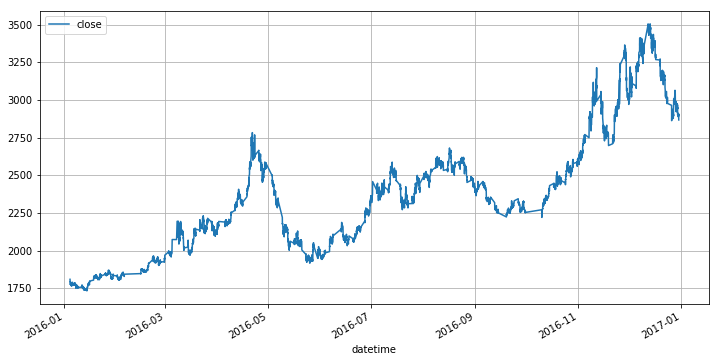

In [50]:
df['return'] = (np.log(df['close'])-np.log(df['close'].shift())).fillna(0)
% matplotlib inline
df.plot('datetime', 'close', grid = True, figsize = (12,6))

### 趋势明显

In [11]:
# 平稳性检测
from statsmodels.tsa.stattools import adfuller
adfuller(df['close'])

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(-1.1961707634800007,
 0.6752407797592945,
 16,
 18288,
 {'1%': -3.4307076234747997,
  '10%': -2.5668541291337483,
  '5%': -2.8616980561919103},
 122479.80317736234)

### pandas 向量化回测

In [52]:
data = pd.DataFrame()
data['close'] = df['close'].copy()
data['change'] = df['close'] - df['close'].shift(1)

#计算均线信号
ma1 = 10
ma2 = 20
ma3 =120
data['ma1'] = df['close'].rolling(window = ma1,center = False).mean()
data['ma2'] = df['close'].rolling(window = ma2,center = False).mean()
data['ma3'] = df['close'].rolling(window = ma3,center = False).mean()
data.dropna(inplace = True)

In [53]:
# 计算交易仓位
data['pos'] = 0
data['pos'][(data['ma3'] > 0) &(data['ma1']>data['ma2']) &(data['ma1'].shift(1) < data['ma2'].shift(1))] = 1
data['pos'][(data['ma3'] > 0) &(data['ma1']<data['ma2']) &(data['ma1'].shift(1) > data['ma2'].shift(1))] = -1
data['pos'][(data['ma3'] < 0) &(data['ma1']>data['ma2']) &(data['ma1'].shift(1) < data['ma2'].shift(1))] = -1
data['pos'][(data['ma3'] < 0) &(data['ma1']<data['ma2']) &(data['ma1'].shift(1) > data['ma2'].shift(1))] = 1

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda2\l

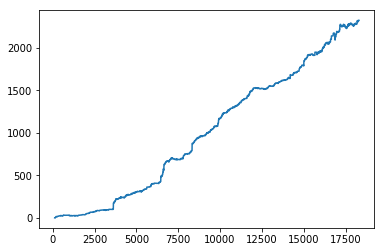

In [56]:
#计算盈亏
data['pnl'] = data['change'] * data['pos']
data['cumpnl'] = data['pnl'].cumsum()
data['cumpnl'].plot()

### pybacktest向量化回测

In [1]:
import pybacktest

In [33]:
#计算均线信号
ma1_L = 10
ma2_L = 20
ma3_L =120
ma1 = ohlc['C'].rolling(window = ma1_L,center = False).mean()
ma2 = ohlc['C'].rolling(window = ma2_L,center = False).mean()
ma3 = ohlc['C'].rolling(window = ma3_L,center = False).mean()

In [36]:
# 生成信号
buy = (ma3 > 0) & (ma1>ma2) &(ma1.shift(1) < ma2.shift(1))

In [38]:
cover = (ma3< 0) &(ma1>ma2) &(ma1.shift(1) < ma2.shift(1))

In [39]:
sell = ('ma3' > 0) &(ma1<ma2) &(ma1.shift(1) > ma2.shift(1))

In [40]:
short = (ma3 < 0) &(ma1<ma2) &(ma1.shift(1) > ma2.shift(1))

In [42]:
bt = pybacktest.Backtest(locals(), 'Triple MA(10,20,120,5min,rb88)')

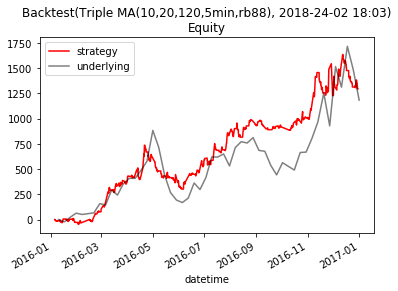

In [43]:
bt.plot_equity()

In [44]:
bt.summary()

----------------------------------------------------------------
|  Backtest(Triple MA(10,20,120,5min,rb88), 2018-24-02 18:03)  |
----------------------------------------------------------------

backtest:
  days: !!python/long '359'
  from: '2016-01-05 22:05:00'
  to: '2016-12-30 11:00:00'
  trades: 421
performance:
  PF: 1.3243
  RF: 2.9839
  averages:
    gain: 31.1059
    loss: -15.9084
    trade: 3.076
  payoff: 1.9553
  profit: 1295.0
  winrate: 0.4038
risk/return profile:
  MPI: 0.6792
  UPI: 0.0194
  WCDD (monte-carlo 0.99 quantile): 880.55
  maxdd: 434.0
  sharpe: 1.3767
  sortino: 1.6441

----------------------------------------------------------------


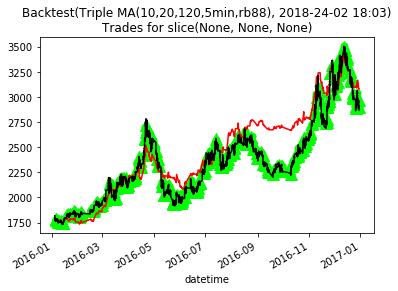

In [45]:
bt.plot_trades()

In [58]:
bt.report

{'backtest': {'days': 359L,
  'from': '2016-01-05 22:05:00',
  'to': '2016-12-30 11:00:00',
  'trades': 421},
 'performance': {'PF': 1.3243,
  'RF': 2.9839,
  'averages': {'gain': 31.1059, 'loss': -15.9084, 'trade': 3.076},
  'payoff': 1.9553,
  'profit': 1295.0,
  'winrate': 0.4038},
 'risk/return profile': {'MPI': 0.6792,
  'UPI': 0.0194,
  'WCDD (monte-carlo 0.99 quantile)': 880.55,
  'maxdd': 434.0,
  'sharpe': 1.3767,
  'sortino': 1.6441}}

### 从向量化回测来看，效果还是挺好的

In [62]:
import matplotlib.pyplot as plt
def plot_mafe(trades, ohlc, figsize = (15,10)):
    """
    trades: pybacktest生成的交易记录
    ohlc: 行情数据
    figsize: 画图尺寸
    """
    trades['profit'] = (trades['price'] - trades['price'].shift())* trades['vol'].shift()
    trades['p_ratio'] = (trades['profit'] / trades['price'].shift())*100.
    
    res = pd.merge(ohlc,trades, how = 'outer',left_index=True, right_index=True)
    dates = zip(trades.index[:-1], trades.index[1:])[::2]
    res['direction'] = res['vol'] * -1
    
    res['highest'] = 0
    res['lowest'] = 0
    res['mae'] = 0
    res['mfe'] = 0
    res['mae_ratio'] = 0
    res['mfe_ratio'] = 0
    
    for first, last in dates:
        res.ix[last, 'highest'] = res[first:last].iloc[:-1]['H'].max()
        res.ix[last, 'lowest'] =  res[first:last].iloc[:-1]['L'].min()
        
        if res.ix[last, 'direction'] == -1.0:
            res.ix[last, 'mae'] = res.ix[last, 'highest'] - res.ix[first, 'O']
            res.ix[last, 'mfe'] =  res.ix[first, 'O'] - res.ix[last, 'lowest']
        elif res.ix[last, 'direction'] == 1.0:
            res.ix[last, 'mfe'] = res.ix[last, 'highest'] - res.ix[first, 'O']
            res.ix[last, 'mae'] =  res.ix[first, 'O'] - res.ix[last, 'lowest']
        
        res.ix[last, 'mae_ratio'] = (res.ix[last, 'mae'] / res.ix[first, 'O'])*100
        res.ix[last, 'mfe_ratio'] = (res.ix[last, 'mfe'] / res.ix[first, 'O'])*100
        
    m_data = res[res['pos'] == 0][['profit','p_ratio','mae','mae_ratio','mfe','mfe_ratio']]
    
    _, ax = plt.subplots( 2,1, figsize = figsize)
    m_data[m_data['profit'] > 0].plot.scatter('mae_ratio','p_ratio',ax = ax[0], color = 'r', marker = '^', title = 'MAE')
    m_data[m_data['profit'] <= 0].plot.scatter('mae_ratio','p_ratio',ax = ax[0], color = 'g', marker = 'v',grid = True)
    m_data[m_data['profit'] > 0].plot.scatter('mfe_ratio','p_ratio',ax = ax[1], color = 'r',marker = '^', title = 'MEF')
    m_data[m_data['profit'] <= 0].plot.scatter('mfe_ratio','p_ratio',ax = ax[1], color = 'g', marker = 'v',grid = True)
    
    return m_data

In [60]:
bt.trades.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 868 entries, 2016-01-05 13:55:00 to 2016-12-30 11:00:00
Data columns (total 3 columns):
pos      868 non-null float64
price    868 non-null float64
vol      868 non-null float64
dtypes: float64(3)
memory usage: 59.1 KB


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


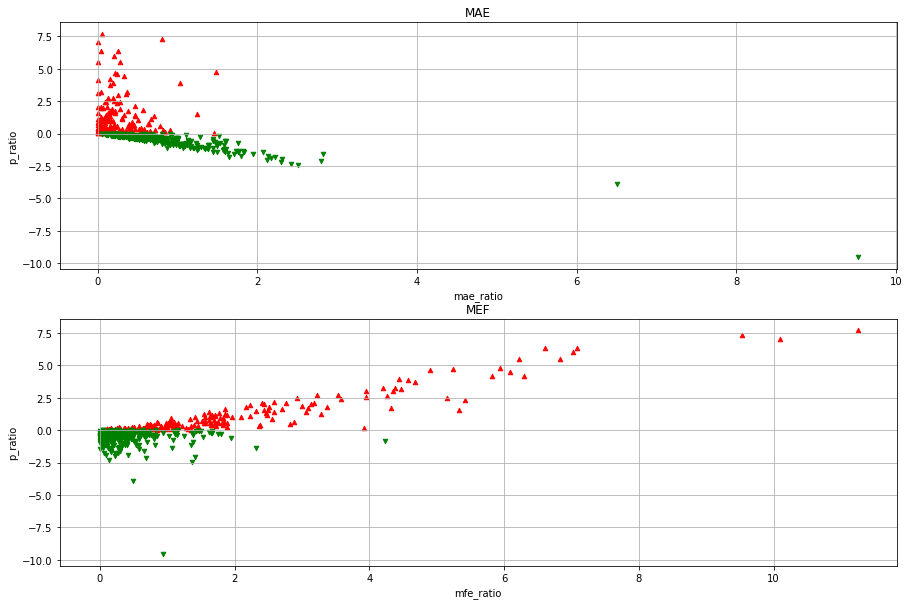

In [63]:
result = plot_mafe(bt.trades, ohlc)

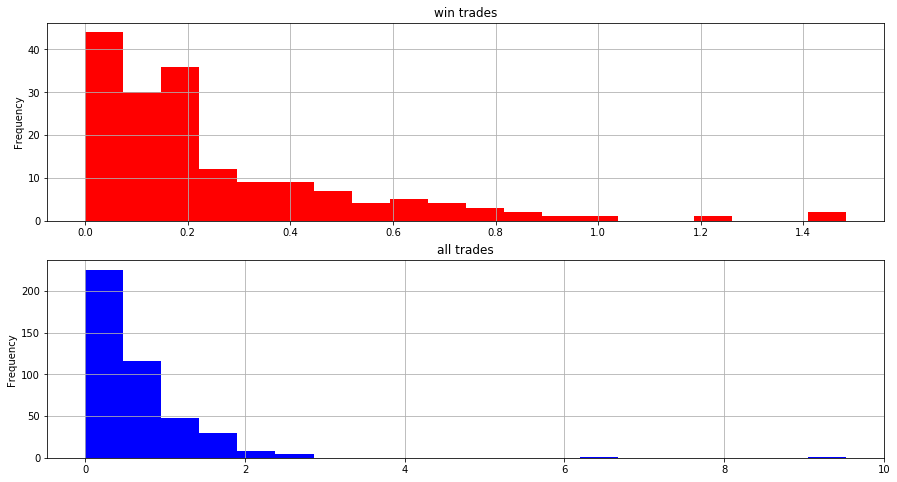

In [64]:
m_data = result
_, ax = plt.subplots( 2, 1, figsize = (15, 8))
m_data[m_data['profit'] > 0]['mae_ratio'].plot.hist(ax = ax[0], color = 'r', bins = 20, grid = True, title = 'win trades')
m_data['mae_ratio'].plot.hist(ax = ax[1], color = 'b', bins = 20, grid = True, title = 'all trades')

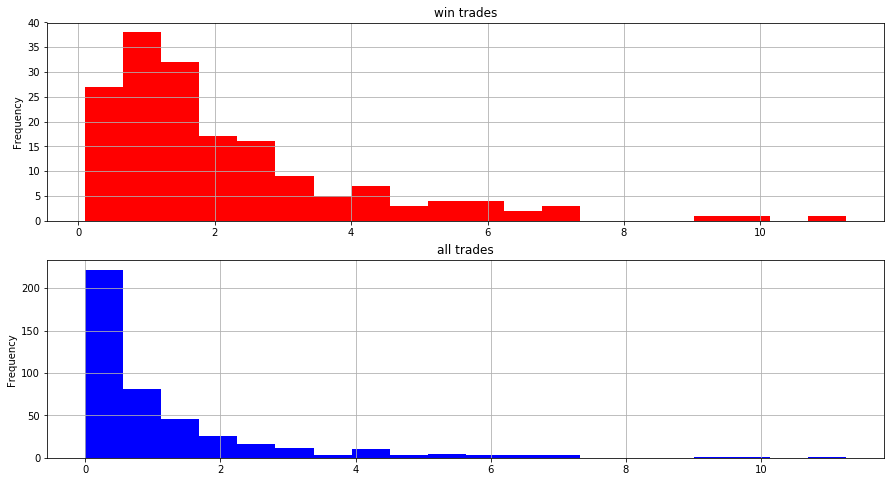

In [65]:
_, ax = plt.subplots( 2, 1, figsize = (15, 8))
m_data[m_data['profit'] > 0]['mfe_ratio'].plot.hist(ax = ax[0], color = 'r', bins = 20, grid = True, title = 'win trades')
m_data['mfe_ratio'].plot.hist(ax = ax[1], color = 'b', bins = 20, grid = True, title = 'all trades')

## VNPY 事件驱动回测

In [3]:
%matplotlib inline

# 从vnpy中加载CTA回测模块中的组件
from vnpy.trader.app.ctaStrategy.ctaBacktesting import BacktestingEngine, OptimizationSetting, MINUTE_DB_NAME

# 从当前目录加载策略类代码
from strategyTripleMA01 import TripleMAStrategy

--------------------
Failed to import strategy file strategy_monday(300607).ipynb:
--------------------
Failed to import strategy file strategy_TripleMa_v0.1:
--------------------
Failed to import strategy file strategy_TripleMa_v0.2:
--------------------
Failed to import strategy file strategy_TripleMa_v0.3:
--------------------
Failed to import strategy file strategy_TripleMa_v0.4:
--------------------
Failed to import strategy file strategy_TripleMa_v0.5:
--------------------
Failed to import strategy file strategyBollingerBot:


Traceback (most recent call last):
  File "C:\ProgramData\Anaconda2\lib\site-packages\vnpy\trader\app\ctaStrategy\strategy\__init__.py", line 18, in loadStrategyModule
    module = importlib.import_module(moduleName)
  File "C:\ProgramData\Anaconda2\lib\importlib\__init__.py", line 37, in import_module
    __import__(name)
ImportError: No module named strategy_monday(300607).ipynb
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda2\lib\site-packages\vnpy\trader\app\ctaStrategy\strategy\__init__.py", line 18, in loadStrategyModule
    module = importlib.import_module(moduleName)
  File "C:\ProgramData\Anaconda2\lib\importlib\__init__.py", line 37, in import_module
    __import__(name)
ImportError: No module named strategy_TripleMa_v0.1
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda2\lib\site-packages\vnpy\trader\app\ctaStrategy\strategy\__init__.py", line 18, in loadStrategyModule
    module = importlib.import_module(moduleName)
  File "C:\ProgramData

In [4]:
# 创建回测引擎对象
engine = BacktestingEngine()
# 设置回测使用的数据
engine.setBacktestingMode(engine.BAR_MODE)    # 设置引擎的回测模式为K线
engine.setDatabase(dbName, symbol)  # 设置使用的历史数据库
engine.setStartDate('20160104')               # 设置回测用的数据起始日期
# 配置回测引擎参数
engine.setSlippage(0)     # 设置滑点为股指1跳
engine.setRate(0.3/10000)   # 设置手续费万0.3
engine.setSize(10)         # 设置股指合约大小 
engine.setPriceTick(1)    # 设置股指最小价格变动   
engine.setCapital(100000)  # 设置回测本金

In [5]:
# 在引擎中创建策略对象

# 使用策略类中的默认参数，则参数配置字典留空
d = {}

# 使用优化后的参数
"""
d = {
    'bollWindow':32,         # 通道窗口数
    'entryDev':2.4,          # 开仓偏差
    'exitDev':1.2,           # 平仓偏差
    'trailingPrcnt':0.4,     # 移动止损百分比
    'maWindow':14,           # 过滤用均线窗口
    'initDays':10,           # 初始化数据所用的天数
    'fixedSize':1            # 每次交易的数量
}  
"""

# 初始化策略
engine.initStrategy(TripleMAStrategy, d)
# 运行回测
engine.runBacktesting()          # 运行回测

2018-03-03 20:56:43.312000	开始载入数据
2018-03-03 20:56:43.345000	载入完成，数据量：18305
2018-03-03 20:56:43.346000	开始回测
2018-03-03 20:56:43.362000	策略初始化完成
2018-03-03 20:56:43.363000	策略启动完成
2018-03-03 20:56:43.363000	开始回放数据
2018-03-03 20:56:44.281000	数据回放结束


2018-03-03 20:56:46.695000	计算按日统计结果
2018-03-03 20:56:46.748000	------------------------------
2018-03-03 20:56:46.749000	首个交易日：	2016-01-14
2018-03-03 20:56:46.749000	最后交易日：	2016-12-30
2018-03-03 20:56:46.749000	总交易日：	247
2018-03-03 20:56:46.749000	盈利交易日	102
2018-03-03 20:56:46.749000	亏损交易日：	123
2018-03-03 20:56:46.749000	起始资金：	100000
2018-03-03 20:56:46.749000	结束资金：	108,035.25
2018-03-03 20:56:46.749000	总收益率：	8.04%
2018-03-03 20:56:46.749000	年化收益：	7.81%
2018-03-03 20:56:46.750000	总盈亏：	8,035.25
2018-03-03 20:56:46.750000	最大回撤: 	-4,143.8
2018-03-03 20:56:46.750000	百分比最大回撤: -3.96%
2018-03-03 20:56:46.750000	总手续费：	504.75
2018-03-03 20:56:46.750000	总滑点：	0.0
2018-03-03 20:56:46.750000	总成交金额：	16,825,110.0
2018-03-03 20:56:46.750000	总成交笔数：	705.0
2018-03-03 20:56:46.750000	日均盈亏：	32.53
2018-03-03 20:56:46.750000	日均手续费：	2.04
2018-03-03 20:56:46.751000	日均滑点：	0.0
2018-03-03 20:56:46.751000	日均成交金额：	68,117.85
2018-03-03 20:56:46.751000	日均成交笔数：	2.85
2018-03-03 20:56:46.751000	日均收益率：	0.03%
2018-03-03 2

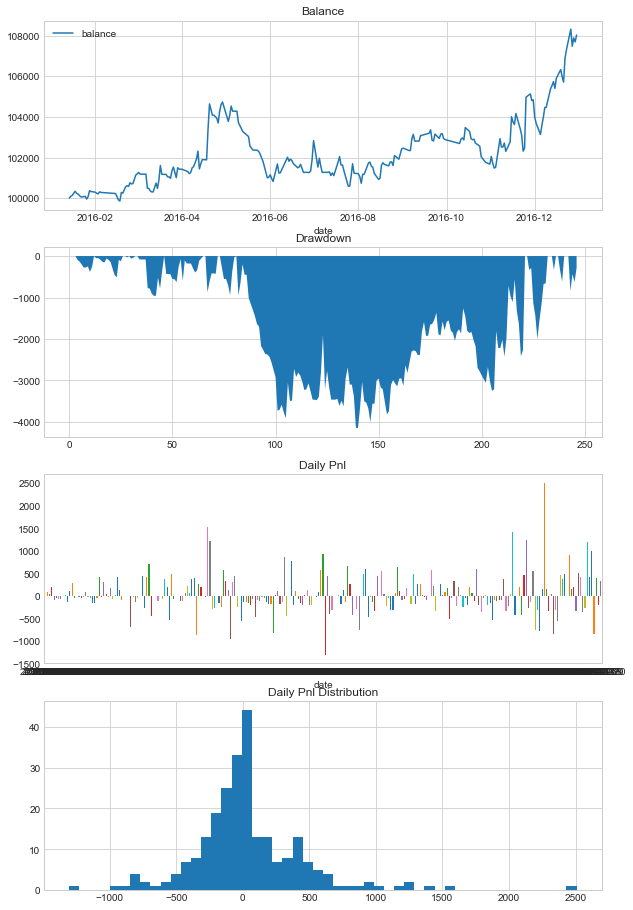

In [6]:
# 显示逐日回测结果
df = engine.showDailyResult()

2018-03-03 20:57:09.107000	计算回测结果
2018-03-03 20:57:09.122000	------------------------------
2018-03-03 20:57:09.122000	第一笔交易：	2016-01-18 13:55:00
2018-03-03 20:57:09.123000	最后一笔交易：	2016-12-30 15:00:00
2018-03-03 20:57:09.123000	总交易次数：	353.0
2018-03-03 20:57:09.123000	总盈亏：	8,034.39
2018-03-03 20:57:09.123000	最大回撤: 	-4,016.11
2018-03-03 20:57:09.123000	平均每笔盈利：	22.76
2018-03-03 20:57:09.123000	平均每笔滑点：	0.0
2018-03-03 20:57:09.123000	平均每笔佣金：	1.43
2018-03-03 20:57:09.123000	胜率		35.69%
2018-03-03 20:57:09.123000	盈利交易平均值	328.56
2018-03-03 20:57:09.123000	亏损交易平均值	-146.98
2018-03-03 20:57:09.124000	盈亏比：	2.24


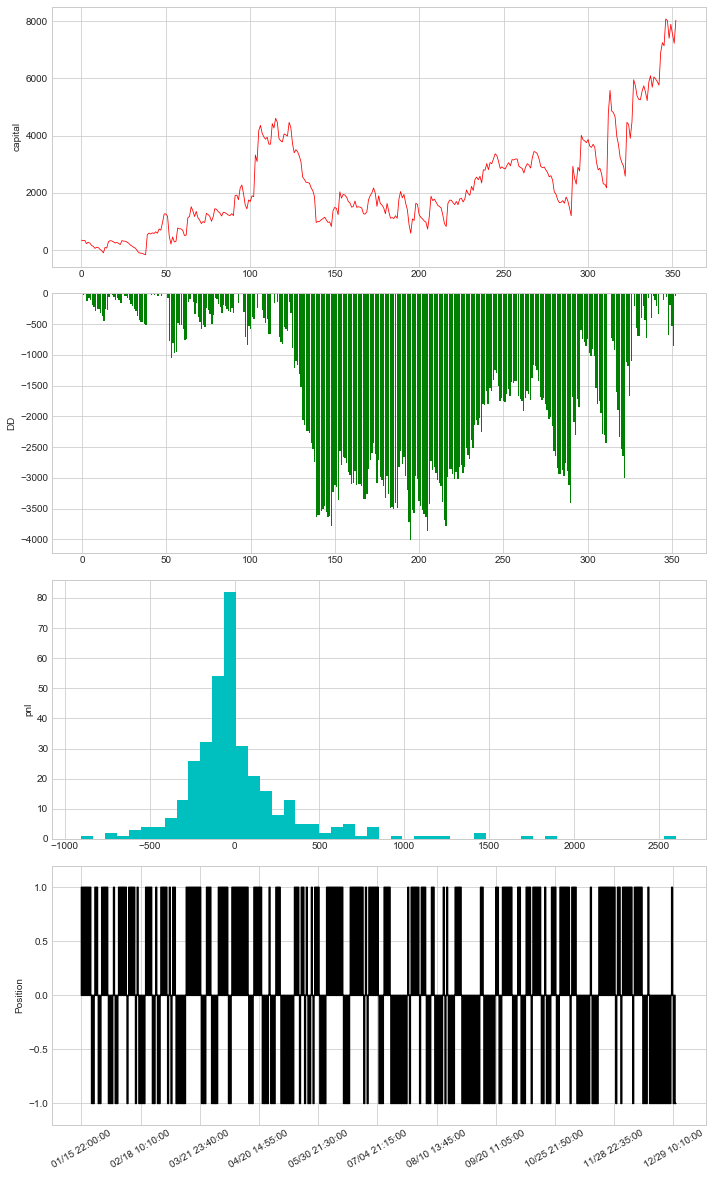

In [7]:
# 显示逐笔回测结果，和逐日回测的统计逻辑不同，因此可以用来检查结果是否正确
engine.showBacktestingResult()

In [24]:
# 显示前50条成交记录
for i in range(50):
    d = engine.tradeDict[str(i+1)].__dict__
    print u'时间%s, 成交编号：%s，方向：%s，开平：%s，数量：%s，价格：%s' %(d['tradeTime'], d['tradeID'], d['direction'], 
                                                                            d['offset'], d['volume'], d['price'])

时间10:35:00, 成交编号：1，方向：多，开平：开仓，数量：1，价格：1745.0
时间14:10:00, 成交编号：2，方向：空，开平：平仓，数量：1，价格：1780.0
时间21:10:00, 成交编号：3，方向：多，开平：开仓，数量：1，价格：1823.0
时间22:15:00, 成交编号：4，方向：空，开平：平仓，数量：1，价格：1819.0
时间23:00:00, 成交编号：5，方向：多，开平：开仓，数量：1，价格：1826.0
时间09:25:00, 成交编号：6，方向：空，开平：平仓，数量：1，价格：1823.0
时间10:35:00, 成交编号：7，方向：多，开平：开仓，数量：1，价格：1825.0
时间11:10:00, 成交编号：8，方向：空，开平：平仓，数量：1，价格：1820.0
时间14:05:00, 成交编号：9，方向：多，开平：开仓，数量：1，价格：1828.0
时间21:50:00, 成交编号：10，方向：空，开平：平仓，数量：1，价格：1832.0
时间22:35:00, 成交编号：11，方向：多，开平：开仓，数量：1，价格：1840.0
时间23:50:00, 成交编号：12，方向：空，开平：平仓，数量：1，价格：1834.0
时间14:40:00, 成交编号：13，方向：多，开平：开仓，数量：1，价格：1821.0
时间21:20:00, 成交编号：14，方向：空，开平：平仓，数量：1，价格：1813.0
时间22:30:00, 成交编号：15，方向：多，开平：开仓，数量：1，价格：1818.0
时间23:30:00, 成交编号：16，方向：空，开平：平仓，数量：1，价格：1813.0
时间21:35:00, 成交编号：17，方向：多，开平：开仓，数量：1，价格：1817.0
时间10:10:00, 成交编号：18，方向：空，开平：平仓，数量：1，价格：1835.0
时间14:40:00, 成交编号：19，方向：多，开平：开仓，数量：1，价格：1831.0
时间14:45:00, 成交编号：20，方向：空，开平：平仓，数量：1，价格：1827.0
时间22:15:00, 成交编号：21，方向：多，开平：开仓，数量：1，价格：1827.0
时间00:30:00, 成交编号：22，方向：空，开平：平仓，数量：1，价格：1834

In [27]:
# 优化配置
setting = OptimizationSetting()                 # 新建一个优化任务设置对象
setting.setOptimizeTarget('totalReturn')            # 设置优化排序的目标是策略净盈利

# setting.addParameter('bollWindow', 20, 40, 2)  # 设置参数优化范围
#setting.addParameter('bollWindow', 32)          # 设置参数优化值

# setting.addParameter('entryDev', 2, 4, 0.2)  
#setting.addParameter('entryDev', 2.4)  

#setting.addParameter('exitDev', 0, 2, 0.2)
#setting.addParameter('exitDev', 1.2)

setting.addParameter('maWindow3', 50, 150, 5)
#setting.addParameter('maWindow', 2, 20, 2)

# 执行多进程优化
import time
start = time.time()
engine.runParallelOptimization(TripleMAStrategy, setting)
print u'耗时：%s' %(time.time()-start)

2018-02-24 23:02:57.322000	------------------------------
2018-02-24 23:02:57.322000	优化结果：
2018-02-24 23:02:57.322000	参数：{'maWindow3': 50}，目标：1.8319146999999925
2018-02-24 23:02:57.322000	参数：{'maWindow3': 55}，目标：1.8319146999999925
2018-02-24 23:02:57.323000	参数：{'maWindow3': 60}，目标：1.8319146999999925
2018-02-24 23:02:57.323000	参数：{'maWindow3': 65}，目标：1.8319146999999925
2018-02-24 23:02:57.323000	参数：{'maWindow3': 70}，目标：1.8319146999999925
2018-02-24 23:02:57.323000	参数：{'maWindow3': 75}，目标：1.8319146999999925
2018-02-24 23:02:57.323000	参数：{'maWindow3': 80}，目标：1.8319146999999925
2018-02-24 23:02:57.323000	参数：{'maWindow3': 85}，目标：1.8319146999999925
2018-02-24 23:02:57.323000	参数：{'maWindow3': 90}，目标：1.8319146999999925
2018-02-24 23:02:57.323000	参数：{'maWindow3': 95}，目标：1.8319146999999925
2018-02-24 23:02:57.323000	参数：{'maWindow3': 100}，目标：1.8319146999999925
2018-02-24 23:02:57.323000	参数：{'maWindow3': 105}，目标：1.8319146999999925
2018-02-24 23:02:57.323000	参数：{'maWindow3': 110}，目标：1.8319146999999